# **Step 1: Import Necessary Libraries**

In [1]:
# Import Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import joblib  # For saving the model


# **Step 2: Load the Dataset**
- Load the churn data from the CSV file and inspect the first few rows to understand its structure.

In [12]:
# Load the Dataset
data = pd.read_csv('Churn_Modelling.csv')

# Inspect the Data
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,Chennai,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,Chennai,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,Chennai,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Bangalore,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,Chennai,Female,28,4,130142.79,1,1,0,38190.78,0


# **Step 3: Data Preprocessing**
- Clean the data by dropping unnecessary columns and encoding categorical features using one-hot encoding.

In [3]:
# Data Preprocessing
# Dropping unnecessary columns
data = data.drop(columns=['RowNumber', 'CustomerId', 'Surname'])

# Convert categorical variables using one-hot encoding
data = pd.get_dummies(data, drop_first=True)

# Separate features and target variable
X = data.drop(columns=['Exited'])  # Features
y = data['Exited']  # Target variable


# **Step 4: Split the Dataset**
- Divide the dataset into training and testing sets for model evaluation.

In [4]:
# Split the Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# **Step 5: Feature Scaling**
- Scale the features to improve the performance of the models, especially those sensitive to the scale of the data.

In [5]:
# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# **Step 6: Initialize Models and Track Performance**
- Train various models (Logistic Regression, SVM, KNN, Decision Tree, Random Forest, and Gradient Boosting) and evaluate their performance.

In [6]:
# Initialize Models and Track Performance
model_performance = {}

# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
logreg_acc = accuracy_score(y_test, y_pred_logreg)
model_performance['Logistic Regression'] = {'accuracy': logreg_acc, 'model': logreg}

# SVM
svm = SVC(probability=True)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
svm_acc = accuracy_score(y_test, y_pred_svm)
model_performance['SVM'] = {'accuracy': svm_acc, 'model': svm}

# KNN
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
knn_acc = accuracy_score(y_test, y_pred_knn)
model_performance['KNN'] = {'accuracy': knn_acc, 'model': knn}

# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
dt_acc = accuracy_score(y_test, y_pred_dt)
model_performance['Decision Tree'] = {'accuracy': dt_acc, 'model': dt}

# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
rf_acc = accuracy_score(y_test, y_pred_rf)
model_performance['Random Forest'] = {'accuracy': rf_acc, 'model': rf}

# Gradient Boosting
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
y_pred_gbc = gbc.predict(X_test)
gbc_acc = accuracy_score(y_test, y_pred_gbc)
model_performance['Gradient Boosting'] = {'accuracy': gbc_acc, 'model': gbc}


# **Step 7: Print Model Accuracies**
- Display the accuracy of each trained model to assess performance.


In [7]:
# Print Model Accuracies
print("Model Accuracies:")
for model, performance in model_performance.items():
    print(f"{model}: {performance['accuracy'] * 100:.2f}%")


Model Accuracies:
Logistic Regression: 81.10%
SVM: 85.80%
KNN: 83.05%
Decision Tree: 78.75%
Random Forest: 86.65%
Gradient Boosting: 86.55%


# **Step 8: Plotting Accuracies**
- Visualize the accuracies of all models using a bar plot for easier comparison.

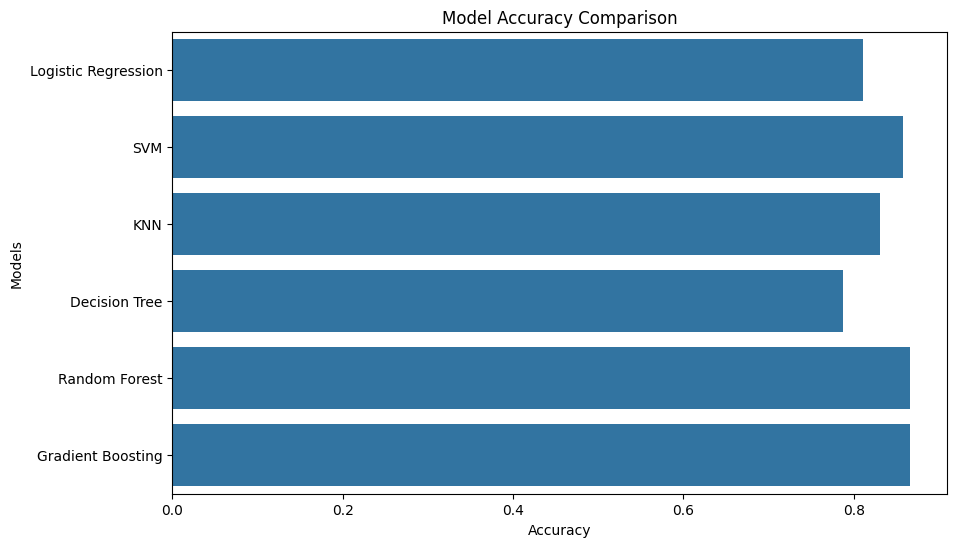

In [8]:
# Plotting Accuracies
model_names = list(model_performance.keys())
accuracies = [performance['accuracy'] for performance in model_performance.values()]

plt.figure(figsize=(10, 6))
sns.barplot(x=accuracies, y=model_names)
plt.xlabel('Accuracy')
plt.ylabel('Models')
plt.title('Model Accuracy Comparison')
plt.show()


# **Step 9: ROC Curve for Model Comparison**
- Calculate and plot ROC curves for all models to compare their performance visually.

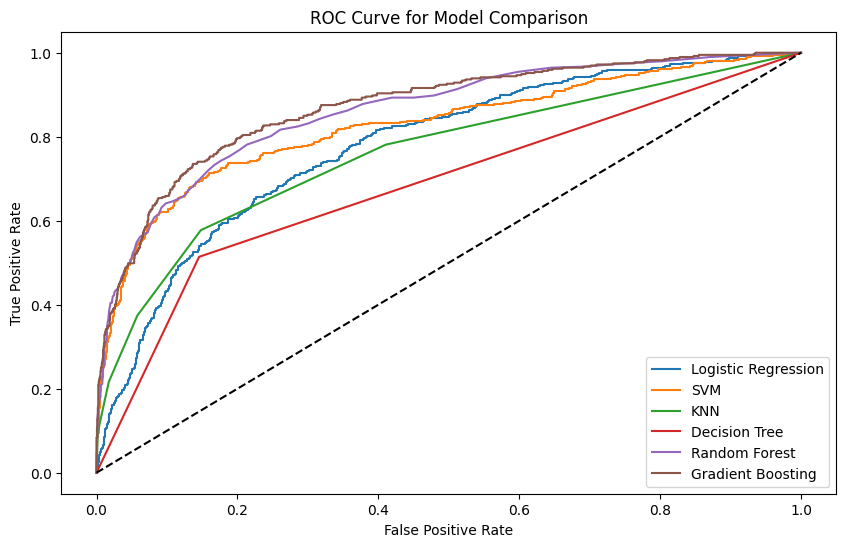

In [9]:
# ROC Curve for Model Comparison
plt.figure(figsize=(10, 6))

# Logistic Regression
logreg_fpr, logreg_tpr, _ = roc_curve(y_test, logreg.predict_proba(X_test)[:, 1])
plt.plot(logreg_fpr, logreg_tpr, label="Logistic Regression")

# SVM
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm.predict_proba(X_test)[:, 1])
plt.plot(svm_fpr, svm_tpr, label="SVM")

# KNN
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn.predict_proba(X_test)[:, 1])
plt.plot(knn_fpr, knn_tpr, label="KNN")

# Decision Tree
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt.predict_proba(X_test)[:, 1])
plt.plot(dt_fpr, dt_tpr, label="Decision Tree")

# Random Forest
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])
plt.plot(rf_fpr, rf_tpr, label="Random Forest")

# Gradient Boosting
gbc_fpr, gbc_tpr, _ = roc_curve(y_test, gbc.predict_proba(X_test)[:, 1])
plt.plot(gbc_fpr, gbc_tpr, label="Gradient Boosting")

# Plot ROC Curve
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Model Comparison')
plt.legend()
plt.show()


# **Step 10: Save the Best Model**
- Identify and save the best-performing model for future use.

In [10]:
# Save the Best Model
best_model_name = max(model_performance, key=lambda model: model_performance[model]['accuracy'])
best_model = model_performance[best_model_name]['model']

# Save the best model to a file
joblib.dump(best_model, 'best_churn_model.pkl')
print(f"The best model is {best_model_name} with an accuracy of {model_performance[best_model_name]['accuracy']:.2f}")


The best model is Random Forest with an accuracy of 0.87


# **Step 11: Load and Use the Saved Model Later**
- Demonstrate how to load the saved model and make predictions.

In [11]:
# Load the saved model
loaded_model = joblib.load('best_churn_model.pkl')

# Example usage of the loaded model for prediction
new_data = X_test[0].reshape(1, -1)  # Use the first test sample as an example
prediction = loaded_model.predict(new_data)
print(f"Prediction for new data: {prediction}")


Prediction for new data: [0]
